## Information About The Features In Our Data

1-age - age in years

2-sex - (1 = male; 0 = female)

3-cp - chest pain type

* 0: Typical angina: chest pain related decrease blood supply to the heart

* 1: Atypical angina: chest pain not related to heart

* 2: Non-anginal pain: typically esophageal spasms (non heart related)

* 3: Asymptomatic: chest pain not showing signs of disease

4-trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5-chol - serum cholestoral in mg/dl

* serum = LDL + HDL + .2 * triglycerides

* above 200 is cause for concern

6-fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* '>126' mg/dL signals diabetes

7-restecg - resting electrocardiographic results

* 0: Nothing to note

* 1: ST-T Wave abnormality

  * can range from mild symptoms to severe problems
  * signals non-normal heart beat

* 2: Possible or definite left ventricular hypertrophy
  * Enlarged heart's main pumping chamber

8-thalach - maximum heart rate achieved

9-exang - exercise induced angina (1 = yes; 0 = no)

10-oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will
stress more

11-slope - the slope of the peak exercise ST segment

* 0: Upsloping: better heart rate with excercise (uncommon)

* 1: Flatsloping: minimal change (typical healthy heart)

* 2: Downslopins: signs of unhealthy heart

12-ca - number of major vessels (0-3) colored by flourosopy

* colored vessel means the doctor can see the blood passing through

* the more blood movement the better (no clots)

13-thal - thalium stress result

* 1,3: normal

* 6: fixed defect: used to be defect but ok now

* 7: reversable defect: no proper blood movement when excercising

14-target - have disease or not 

## Important Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay 
from sklearn import metrics

## Loading And Exploring Data

In [2]:
hd=pd.read_csv("heart-disease.csv")
hd.shape

(303, 14)

In [3]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
hd["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

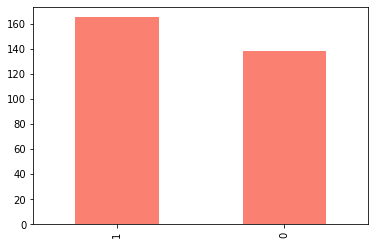

In [6]:
hd["target"].value_counts().plot(kind="bar",color="salmon");

In [7]:
hd['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

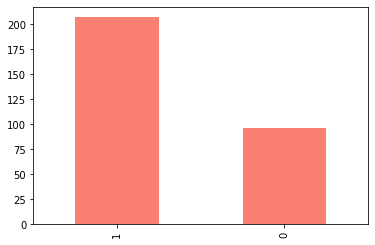

In [8]:
hd.sex.value_counts().plot(kind="bar",color="salmon");

In [9]:
pd.crosstab(hd.sex,hd.target)

target,0,1
sex,,
0,24,72
1,114,93


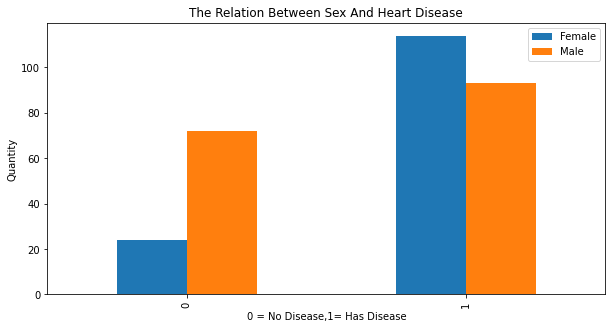

In [10]:
pd.crosstab(hd.sex,hd.target).plot(kind="bar",figsize=(10,5))
plt.title("The Relation Between Sex And Heart Disease")
plt.xlabel("0 = No Disease,1= Has Disease")
plt.ylabel("Quantity")
plt.legend(["Female","Male"]);

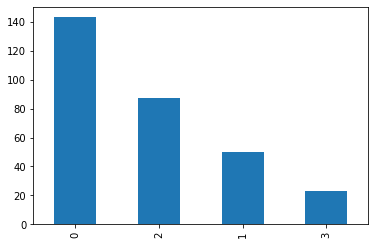

In [11]:
hd.cp.value_counts().plot(kind="bar");

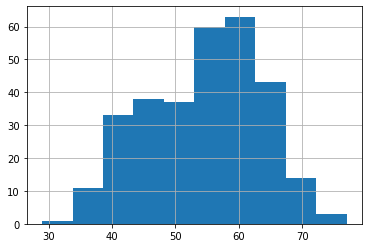

In [12]:
hd.age.hist();

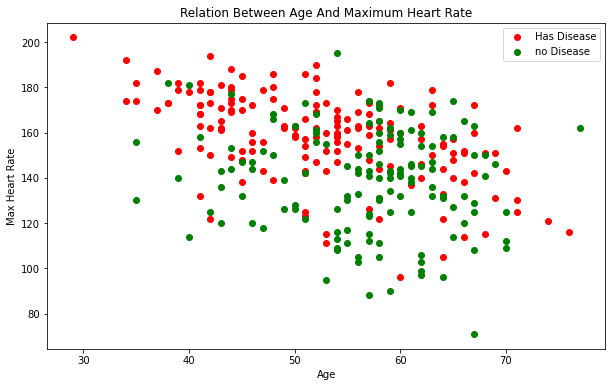

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(hd.age[hd.target==1],hd.thalach[hd.target==1],color= "red")
plt.scatter(hd.age[hd.target==0],hd.thalach[hd.target==0],color="green")
plt.title("Relation Between Age And Maximum Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Has Disease","no Disease"]);

## Training And Testing

In [14]:
#Splitting The Data
X=hd.drop("target",axis=1)
Y=hd["target"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size= 0.2,random_state= 42)

In [15]:
# Assigning The Model
clf= LogisticRegression()

In [16]:
#Fitting The Model
clf.fit(X_train,Y_train)
#Getting The Accuracy Of The Model
clf.score(X_test,Y_test)

0.8852459016393442

## Evaluation

In [17]:
Y_preds=clf.predict(X_test)

In [18]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



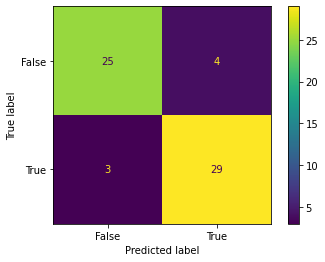

In [19]:
co = metrics.confusion_matrix(Y_test, Y_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = co, display_labels = [False, True])

cm_display.plot()
plt.show()

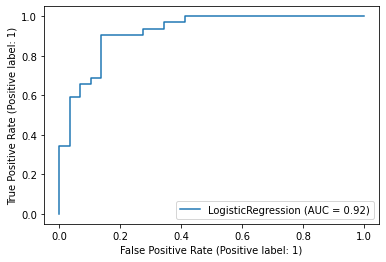

In [20]:
 
 RocCurveDisplay.from_estimator(clf, 
                               X_test, 
                               Y_test);